<a href="https://colab.research.google.com/github/V3ct4r31/TelecomX_challenge1/blob/main/telecom_x_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TELECOM X**
##**"CHURN DE CLIENTES"**

# **Introducción**
 La empresa Telecom X es una empresa de telecomunicaciones que está enfrentando un alto índice de evasión de clientes (alta tasa de cancelaciones) y aún no han identificado el problema de esta pérdida de clientes. Por esta razón, deciden iniciar un proyecto específico de Churn de clientes. Para ello, se nos ha proporcionado datos de la empresa para realizar el análisis exploratorio de ellos para posteriormente entregarlos al equipo de ciencia de datos, quienes realizarán el análisis predictivo que determinará que factores contribuyen a esta evasión de clientes.

# Exploración de datos Telecom X

In [2]:
import pandas as pd
import numpy as np

datos = pd.read_json('/content/TelecomX_Data.json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
datos.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [5]:
datos.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [6]:
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])

In [7]:
df_expanded = pd.concat([
    datos[['customerID', 'Churn']],
    customer_df,
    phone_df,
    internet_df,
    account_df
], axis=1)

In [8]:
df_expanded.columns.tolist()

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [9]:
df_expanded.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [10]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


# Limpieza y transformación de datos

In [11]:
df_expanded['Charges.Total'] = df_expanded['Charges.Total'].apply(
    lambda x: str(x).replace('$', '').replace(',', '').strip()
)

df_expanded['Charges.Monthly'] = df_expanded['Charges.Monthly'].apply(
    lambda x: str(x).replace('$', '').replace(',', '').strip()
)

In [12]:
df_expanded['Charges.Total'] = pd.to_numeric(df_expanded['Charges.Total'], errors='coerce')
df_expanded['Charges.Monthly'] = pd.to_numeric(df_expanded['Charges.Monthly'], errors='coerce')

In [13]:
df_expanded[['Charges.Total', 'Charges.Monthly']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Charges.Total    7256 non-null   float64
 1   Charges.Monthly  7267 non-null   float64
dtypes: float64(2)
memory usage: 113.7 KB


In [14]:
cols_to_map = [
                'Churn',
                'Partner',
                'Dependents',
                'PhoneService',
                'MultipleLines',
                'OnlineSecurity',
                'OnlineBackup',
                'DeviceProtection',
                'TechSupport',
                'StreamingTV',
                'StreamingMovies',
                'PaperlessBilling'
]


for col in cols_to_map:
    print(f"{col}: {df_expanded[col].unique()}")


Churn: ['No' 'Yes' '']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
PaperlessBilling: ['Yes' 'No']


In [15]:
df_expanded[df_expanded['Charges.Total'].isna()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [16]:
# Reemplazar los espacios vacíos por 'No' para que el mapeo funcione bien
df_expanded['Churn'] = df_expanded['Churn'].replace(' ', 'No')

cols_yes_no = ['Churn',
               'Partner',
               'Dependents',
               'PhoneService',
               'MultipleLines',
               'OnlineSecurity',
               'OnlineBackup',
               'DeviceProtection',
               'TechSupport',
               'StreamingTV',
               'StreamingMovies',
               'PaperlessBilling']

# Aplicar el mapeo usando replace, que es más seguro
mapping = {
    'Yes': 1,
    'No': 0,
    'No internet service': 0,
    'No phone service': 0
}

cols_to_map = [col for col in cols_yes_no if col in df_expanded.columns]

for col in cols_to_map:
    df_expanded[col] = pd.to_numeric(
        df_expanded[col].replace(mapping), errors='coerce'
    ).fillna(0).astype(int)


/tmp/ipython-input-57755563.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_expanded[col].replace(mapping), errors='coerce'
/tmp/ipython-input-57755563.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_expanded[col].replace(mapping), errors='coerce'
/tmp/ipython-input-57755563.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option(

In [17]:
cols_categoricas = ['gender', 'PaymentMethod', 'Contract']

for col in cols_categoricas:
  print(f"{col}: {df_expanded[col].unique()}")

gender: ['Female' 'Male']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Contract: ['One year' 'Month-to-month' 'Two year']


In [18]:
# Primero revisar que todos los valores sean texto
df_expanded['gender'] = df_expanded['gender'].astype(str).str.strip().str.lower()

In [19]:
df_expanded['Contract'] = df_expanded['Contract'].astype(str).str.strip().str.lower()

# Luego reemplazar por números y convierte explícitamente a int
df_expanded['Contract'] = df_expanded['Contract'].replace({'month-to-month': 1, 'one year': 12, 'two year': 24}).astype(int)

/tmp/ipython-input-2090594746.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_expanded['Contract'] = df_expanded['Contract'].replace({'month-to-month': 1, 'one year': 12, 'two year': 24}).astype(int)


In [20]:
df_expanded['PaymentMethod'] = df_expanded['PaymentMethod'].astype(str).str.strip().str.lower()

In [21]:
# Eliminar en sitio (modifica el DataFrame original)
df_expanded.drop(columns=['customerID'], inplace=True)

#Columna de cuentas diarias

In [22]:
# Crear columna Cuentas_Diarias dividiendo entre 30 días
df_expanded['Cuentas_Diarias'] = df_expanded['Charges.Monthly'] / 30

df_expanded[['Charges.Monthly', 'Cuentas_Diarias']].head()

,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


# Revisión de la transformación y estandarización de datos del Dataframe

In [23]:
# 1. Revisar tipos de datos por columna
print(df_expanded.dtypes)

Churn                 int64
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
Cuentas_Diarias     float64
dtype: object


In [24]:
print(df_expanded['InternetService'].unique())

['DSL' 'Fiber optic' 'No']


In [25]:
df_expanded['InternetService'] = df_expanded['InternetService'].str.strip().str.lower()

In [26]:
# 2. Revisar valores únicos por columna categórica para detectar valores extraños
cols_categoricas = ['gender', 'PaymentMethod', 'Contract']  # ajusta según tus columnas
for col in cols_categoricas:
    print(f"{col}: {df_expanded[col].unique()}")

gender: ['female' 'male']
PaymentMethod: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']
Contract: [12  1 24]


In [27]:
# 3. Revisar si hay valores faltantes en todo el DataFrame
print(df_expanded.isnull().sum())

Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
Cuentas_Diarias      0
dtype: int64


# Análisis descriptivo

Se realizó un análisis estadístico descriptivo de las columnas numéricas del conjunto de datos. Las métricas calculadas incluyen:

- **Media**
- **Mediana (50%)**
- **Desviación estándar**
- **Mínimo y máximo**
- **Cuartiles (25% y 75%)**

Esto permite comprender la distribución de los valores y detectar posibles sesgos, valores atípicos o patrones en variables como `tenure`, `Charges.Monthly`, `Charges.Total`, y otras relacionadas al comportamiento del cliente.

El análisis se realizó utilizando la función `df.describe()`, y servirá como base para entender las diferencias entre clientes que permanecen y los que hacen "churn".

In [28]:
print(df_expanded['Charges.Total'].describe())

count    7256.000000
mean     2280.634213
std      2268.632997
min        18.800000
25%       400.225000
50%      1391.000000
75%      3785.300000
max      8684.800000
Name: Charges.Total, dtype: float64


In [29]:
# Mostrar las filas con valores nulos en Charges.Total
df_expanded[df_expanded['Charges.Total'].isnull()]

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
975,0,female,0,1,1,0,0,0,dsl,1,...,1,1,1,0,24,0,credit card (automatic),56.05,NaN,1.868333
1775,0,female,0,1,1,0,1,0,no,0,...,0,0,0,0,24,0,mailed check,20.00,NaN,0.666667
1955,0,male,0,0,1,0,1,1,dsl,1,...,0,1,0,0,24,1,bank transfer (automatic),61.90,NaN,2.063333
2075,0,male,0,1,1,0,1,0,no,0,...,0,0,0,0,12,1,mailed check,19.70,NaN,0.656667
2232,0,male,0,0,1,0,1,0,no,0,...,0,0,0,0,24,0,mailed check,20.25,NaN,0.675000
2308,0,male,0,1,1,0,1,1,no,0,...,0,0,0,0,24,0,mailed check,25.35,NaN,0.845000
2930,0,female,0,1,1,0,1,1,dsl,0,...,1,1,1,0,24,0,mailed check,73.35,NaN,2.445000
3134,0,male,0,1,1,0,1,1,no,0,...,0,0,0,0,24,0,mailed check,25.75,NaN,0.858333
3203,0,female,0,1,1,0,0,0,dsl,1,...,1,1,1,0,24,1,bank transfer (automatic),52.55,NaN,1.751667
4169,0,female,0,1,1,0,1,0,dsl,1,...,1,0,1,1,24,0,mailed check,80.85,NaN,2.695000


In [30]:
# Mostrar solo las columnas que tienen valores faltantes
df_expanded.isnull().sum()[df_expanded.isnull().sum() > 0]

,0
Charges.Total,11


In [31]:
# 4. Revisar estadísticos básicos para las columnas numéricas
print(df_expanded.describe())

             Churn  SeniorCitizen      Partner   Dependents       tenure  \
count  7267.000000    7267.000000  7267.000000  7267.000000  7267.000000   
mean      0.257190       0.162653     0.484106     0.300124    32.346498   
std       0.437115       0.369074     0.499782     0.458343    24.571773   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       0.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
count   7267.000000    7267.000000     7267.000000   7267.000000   
mean       0.902711       0.421770        0.285950      0.344571   
std        0.296371       0.493876        0.451897      0.475261   
min        0.000000       0.000000        0

In [32]:
# 5. Ver los primeros registros para chequeo visual rápido
print(df_expanded.head())

   Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0      0  female              0        1           1       9             1   
1      0    male              0        0           0       9             1   
2      1    male              0        0           0       4             1   
3      1    male              1        1           0      13             1   
4      1  female              1        1           0       3             1   

   MultipleLines InternetService  OnlineSecurity  ...  DeviceProtection  \
0              0             dsl               0  ...                 0   
1              1             dsl               0  ...                 0   
2              0     fiber optic               0  ...                 1   
3              0     fiber optic               0  ...                 1   
4              0     fiber optic               0  ...                 0   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0   

#**CARGA Y ANÁLISIS**

In [33]:
df_expanded.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

##**1.Distribución de evasión**

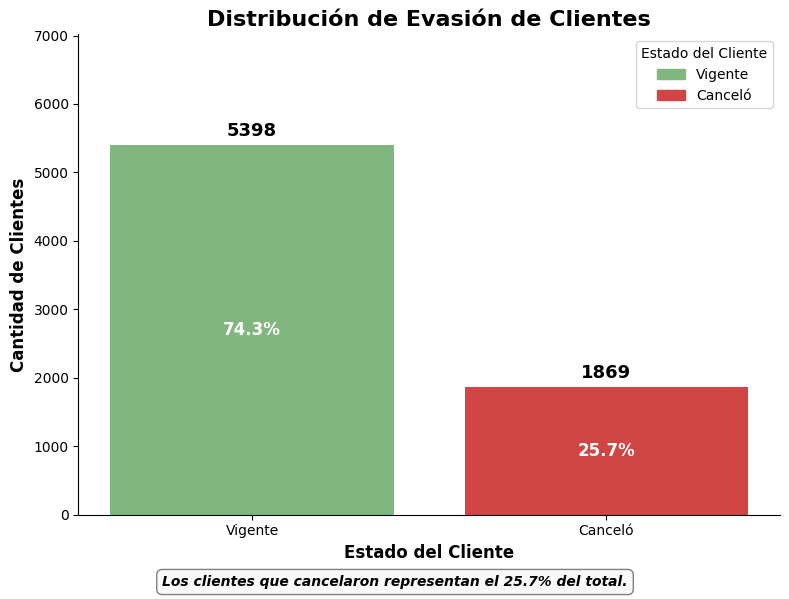

In [34]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Asegurarse de usar todo el DataFrame sin filtro
conteo = df_expanded['Churn'].value_counts().sort_index()
etiquetas = ['Vigente', 'Canceló']
colores = ['#7FB77E', '#D24545']  # Verde oliva y rojo vino
total_clientes = conteo.sum()
porcentajes = conteo / total_clientes * 100

plt.rcParams.update({'font.family': 'sans-serif'})

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(etiquetas, conteo.values, color=colores, width=0.8)

# Título y etiquetas
ax.set_title('Distribución de Evasión de Clientes', fontsize=16, weight='bold')
ax.set_xlabel('Estado del Cliente', fontsize=12, weight='bold')
ax.set_ylabel('Cantidad de Clientes', fontsize=12, weight='bold')

# Agregar número y porcentaje a cada barra
for i, bar in enumerate(bars):
    height = bar.get_height()

    # Número encima
    ax.text(bar.get_x() + bar.get_width()/2, height + total_clientes * 0.01,
            f"{int(height)}", ha='center', va='bottom',
            fontsize=13, weight='bold', color='black')

    # Porcentaje dentro
    ax.text(bar.get_x() + bar.get_width()/2, height * 0.5,
            f"{porcentajes[i]:.1f}%", ha='center', va='center',
            fontsize=12, weight='bold', color='white')

# Leyenda
leyenda = [Patch(color=colores[0], label='Vigente'),
           Patch(color=colores[1], label='Canceló')]
ax.legend(handles=leyenda, title='Estado del Cliente', loc='upper right')

# Comentario centrado al pie
comentario = f"Los clientes que cancelaron representan el {porcentajes[1]:.1f}% del total."
fig.text(0.5, 0.01, comentario,
         ha='center', va='bottom',
         fontsize=10, style='italic', weight='bold',
         bbox=dict(boxstyle="round,pad=0.4", fc="#f9f9f9", ec="gray"))

# Estética
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)
ax.set_ylim(0, max(conteo.values) * 1.3)
plt.tight_layout(rect=[0, 0.03, 1, 1])

plt.show()


In [35]:
df_expanded.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

# 2.Recuento de evasión por variables categóricas

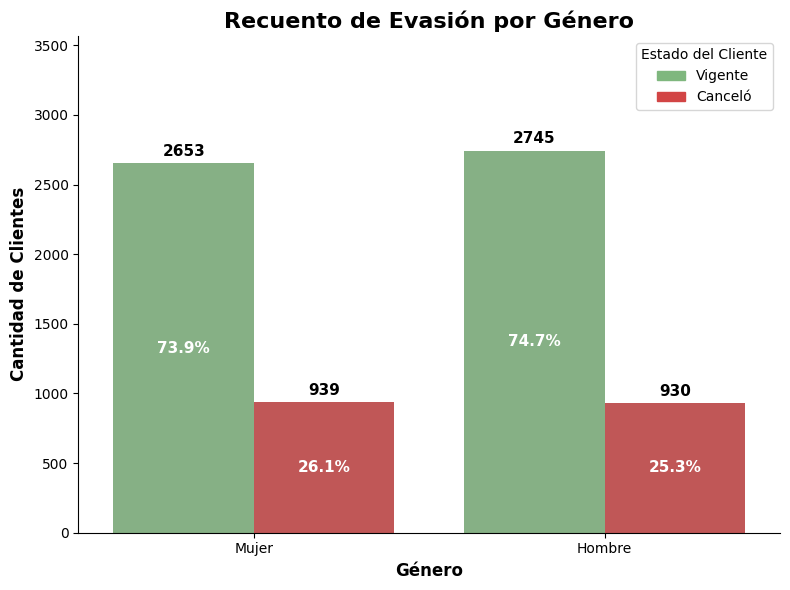

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Mapear columnas a etiquetas legibles
df_expanded['Genero_Label'] = df_expanded['gender'].replace({'female': 'Mujer', 'male': 'Hombre'})
df_expanded['Churn_Label'] = df_expanded['Churn'].replace({0: 'Vigente', 1: 'Canceló'})

# Colores personalizados (verde oliva y rojo vino)
colores = ['#7FB77E', '#D24545']

# Crear gráfico
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(data=df_expanded, x='Genero_Label', hue='Churn_Label', palette=colores)

# Título y etiquetas
ax.set_title('Recuento de Evasión por Género', fontsize=16, weight='bold')
ax.set_xlabel('Género', fontsize=12, weight='bold')
ax.set_ylabel('Cantidad de Clientes', fontsize=12, weight='bold')

# Quitar bordes y grilla
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

# Calcular totales por grupo para porcentajes
total_por_grupo = df_expanded.groupby('Genero_Label').size()

# Mostrar valores y porcentajes
for p in ax.patches:
    height = p.get_height()

    # Obtener centro de la barra
    x_pos = p.get_x() + p.get_width() / 2.

    # Determinar género desde la posición x del centro de la barra
    genero_label = 'Mujer' if x_pos < 0.5 else 'Hombre'
    total = total_por_grupo[genero_label]
    porcentaje = height / total * 100

    # Mostrar cantidad (solo si altura > 0)
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (x_pos, height + 30),
                    ha='center', va='bottom', fontsize=11, weight='bold')

    # Mostrar porcentaje (solo si porcentaje > 1% y barra suficientemente alta)
    if porcentaje > 1 and height > 20:
        ax.annotate(f'{porcentaje:.1f}%',
                    (x_pos, height * 0.5),
                    ha='center', va='center', fontsize=11, weight='bold', color='white')

# Leyenda personalizada
handles = [Patch(color=colores[0], label='Vigente'),
           Patch(color=colores[1], label='Canceló')]
ax.legend(handles=handles, title='Estado del Cliente', loc='upper right')

# Ajustar límites del eje y
ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.3)

plt.tight_layout()
plt.show()


In [37]:
df_expanded.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'Genero_Label',
       'Churn_Label'],
      dtype='object')

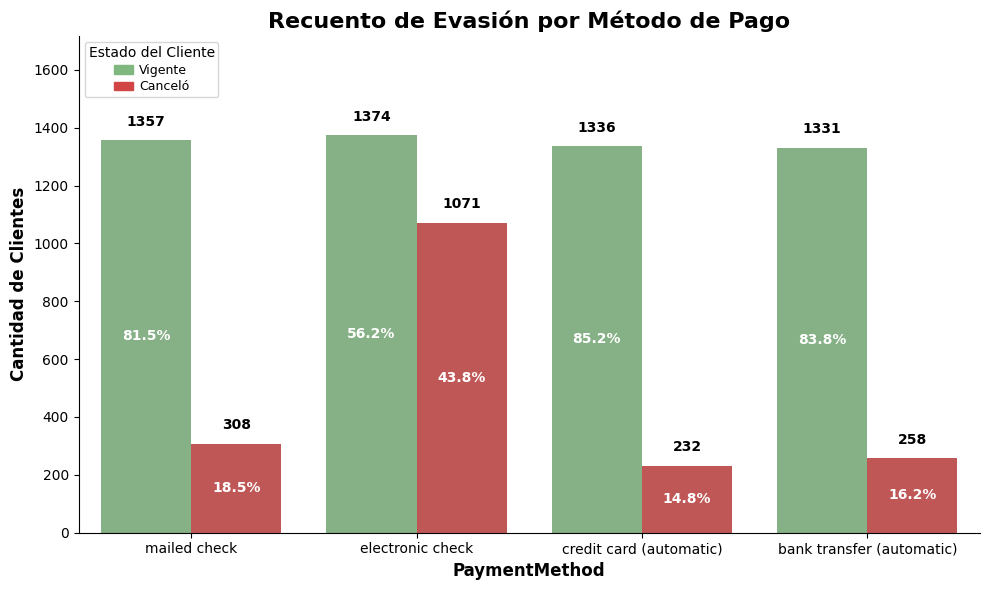

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Mapear etiquetas legibles
df_expanded['Churn_Label'] = df_expanded['Churn'].replace({0: 'Vigente', 1: 'Canceló'})

# Colores personalizados
colores = ['#7FB77E', '#D24545']

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(data=df_expanded, x='PaymentMethod', hue='Churn_Label', palette=colores)

# Títulos y etiquetas
ax.set_title('Recuento de Evasión por Método de Pago', fontsize=16, weight='bold')
ax.set_xlabel('PaymentMethod', fontsize=12, weight='bold')
ax.set_ylabel('Cantidad de Clientes', fontsize=12, weight='bold')

# Eliminar bordes y grilla
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

# Totales por categoría
totales = df_expanded.groupby('PaymentMethod').size()

# Anotar valores y porcentajes
for p in ax.patches:
    height = p.get_height()
    if height == 0:
        continue

    x = p.get_x() + p.get_width() / 2
    # Obtener etiquetas reales desde ticks
    x_labels = [tick.get_text() for tick in ax.get_xticklabels()]
    idx = int(round(p.get_x() + p.get_width() / 2))
    if idx < len(x_labels):
        categoria = x_labels[idx]
    else:
        continue

    total = totales.get(categoria, 1)
    porcentaje = height / total * 100

    # Cantidad (arriba)
    ax.annotate(f'{int(height)}',
                (x, height + 40),
                ha='center', va='bottom',
                fontsize=10, weight='bold')

    # Porcentaje (dentro)
    ax.annotate(f'{porcentaje:.1f}%',
                (x, height * 0.5),
                ha='center', va='center',
                fontsize=10, weight='bold', color='white')

# Leyenda dentro del gráfico con tamaño reducido
handles = [Patch(color=colores[0], label='Vigente'),
           Patch(color=colores[1], label='Canceló')]
legend = ax.legend(handles=handles,
                   title='Estado del Cliente',
                   title_fontsize=10,       # Tamaño del título
                   fontsize=9,              # Tamaño del texto de la leyenda
                   loc='upper left',
                   frameon=True,
                   borderpad=0.3,           # Padding interno
                   labelspacing=0.3,        # Espacio entre líneas
                   handlelength=1.5,        # Largo del ícono de color
                   handletextpad=0.5)       # Espacio entre ícono y texto

# Limitar eje y
ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.25)
plt.tight_layout()
plt.show()


In [39]:
df_expanded.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'Genero_Label',
       'Churn_Label'],
      dtype='object')

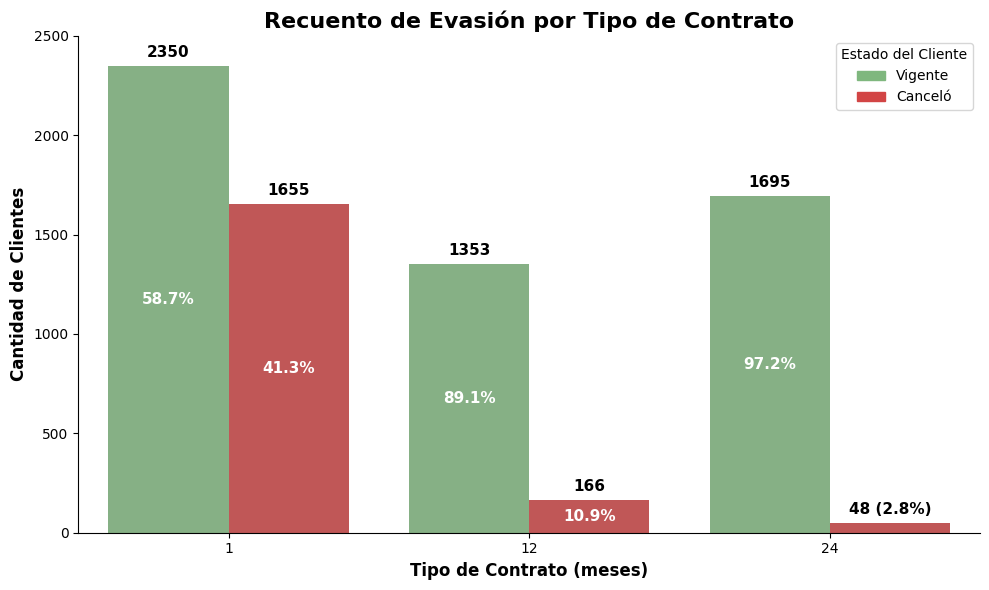

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import pandas as pd
import matplotlib.colors as mcolors

# Datos originales
data = {
    'Contract': [1, 1, 12, 12, 24, 24],
    'Churn_Label': ['Vigente', 'Canceló', 'Vigente', 'Canceló', 'Vigente', 'Canceló'],
    'Cantidad': [2350, 1655, 1353, 166, 1695, 48],
    'Total':[4005,4005,1519,1519,1743,1743]
}

df_grafico = pd.DataFrame(data)

# El cálculo del porcentaje
df_grafico['Porcentaje'] = (df_grafico['Cantidad'] * 100) / df_grafico['Total']

# Colores personalizados
colores = ['#7FB77E', '#D24545']

# Crear figura y gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bars = sns.barplot(data=df_grafico, x='Contract', y='Cantidad', hue='Churn_Label', palette=colores, ax=ax)

# Títulos y etiquetas
ax.set_title('Recuento de Evasión por Tipo de Contrato', fontsize=16, weight='bold')
ax.set_xlabel('Tipo de Contrato (meses)', fontsize=12, weight='bold')
ax.set_ylabel('Cantidad de Clientes', fontsize=12, weight='bold')

# Quitar bordes y grilla
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

# Calcular totales por contrato
totales_por_contrato = df_grafico.groupby('Contract')['Cantidad'].sum()

# Mostrar valores y porcentajes
for p in ax.patches:
    height = p.get_height()
    x_pos = p.get_x() + p.get_width() / 2.0

    # Obtener el contrato y el estado del cliente de la barra
    contrato = int(df_grafico['Contract'].unique()[int(p.get_x() + 0.5)])

    # Asignar estado del cliente basado en el color para simular la leyenda
    if p.get_facecolor() == tuple(c / 255 for c in (127, 183, 126, 255)): # Color verde
        estado_cliente = 'Vigente'
    else: # Color rojo
        estado_cliente = 'Canceló'

    total = totales_por_contrato[contrato]
    porcentaje = (height / total) * 100

    # Lógica de anotación para todas las barras
    if height > 0:
        if int(height) == 48:
            # Para la barra de 48, colocar el número y porcentaje encima
            ax.annotate(f'{int(height)} ({porcentaje:.1f}%)',
                        (x_pos, height + 30),
                        ha='center', va='bottom', fontsize=11, weight='bold')
        else:
            # Para las demás barras, colocar el número encima
            ax.annotate(f'{int(height)}',
                        (x_pos, height + 30),
                        ha='center', va='bottom', fontsize=11, weight='bold')

            # Y el porcentaje dentro si la barra es lo suficientemente alta
            if porcentaje > 1 and height > 20:
                ax.annotate(f'{porcentaje:.1f}%',
                            (x_pos, height * 0.5),
                            ha='center', va='center', fontsize=11, weight='bold', color='white')

# Leyenda personalizada
handles = [Patch(color=colores[0], label='Vigente'),
           Patch(color=colores[1], label='Canceló')]
ax.legend(handles=handles, title='Estado del Cliente', loc='upper right')

# Ajustar límite del eje Y
ax.set_ylim(0, 2500)
plt.tight_layout()
plt.show()


# 3.Recuento de evasión por variables numéricas

In [41]:
print(df_expanded.columns)

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'Genero_Label',
       'Churn_Label'],
      dtype='object')


Gráfico guardado en: Permanencia_Churn.png


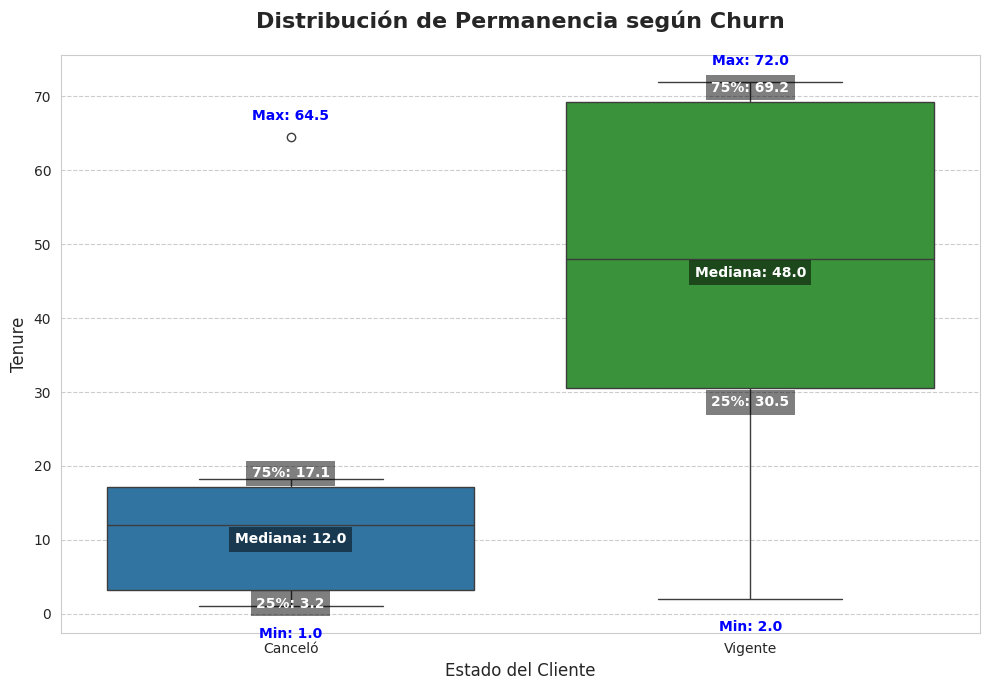

Gráfico guardado en: Cargos_Mensuales_Churn.png


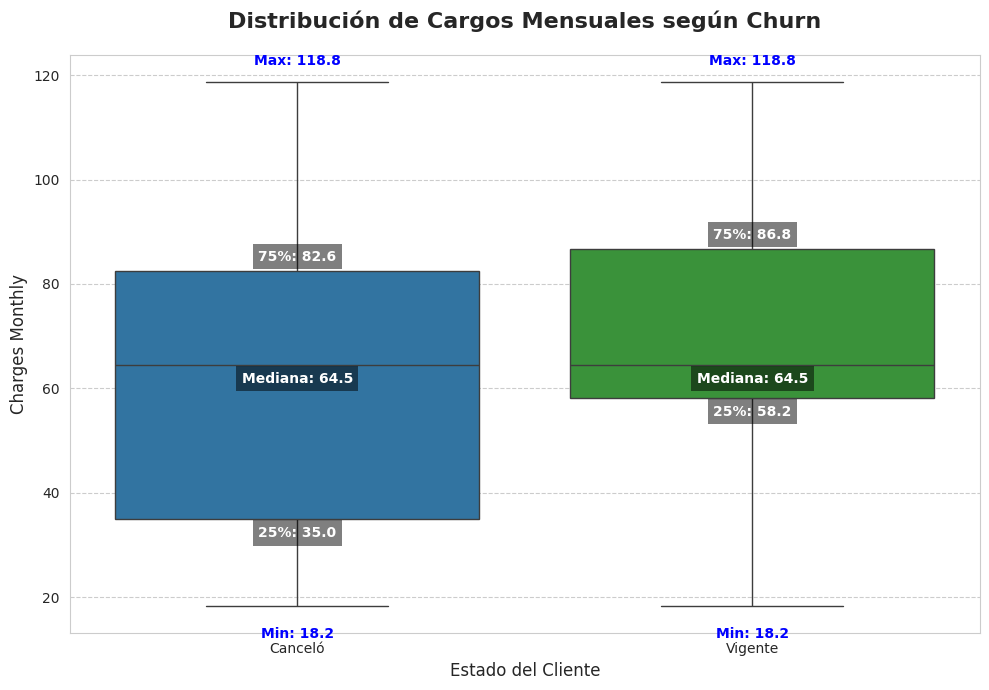

Gráfico guardado en: Cargos_Totales_Churn.png


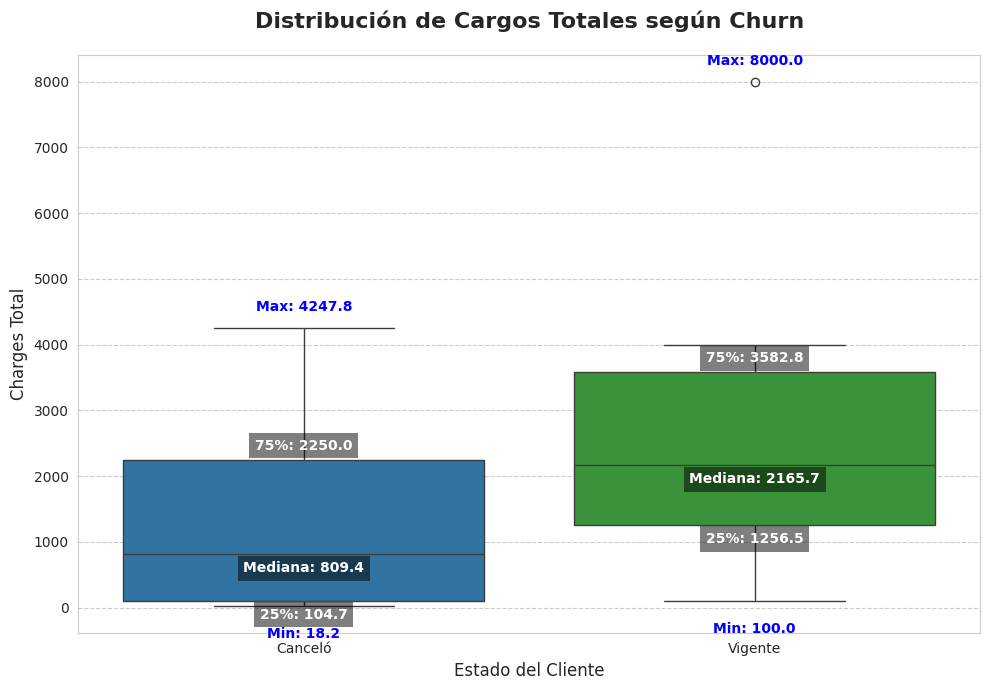

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Reemplaza esto con tu DataFrame real
data = {'Tenure': [64.5, 61.0, 29.0, 14.0, 18.2, 2.0, 72.0, 1.0, 35.0, 10.0, 72.0, 1.0],
        'Charges Monthly': [64.5, 64.5, 56.1, 25.1, 18.2, 18.2, 94.2, 88.6, 118.8, 118.8, 64.5, 64.5],
        'Charges Total': [4247.8, 2331.3, 1008.6, 118.8, 18.2, 8000, 100, 2500, 4000, 1500, 2000, 100],
        'Estado del Cliente': ['Canceló', 'Vigente', 'Vigente', 'Canceló', 'Canceló', 'Vigente', 'Vigente', 'Canceló', 'Vigente', 'Canceló', 'Vigente', 'Canceló']}
df = pd.DataFrame(data)

def plot_boxplot_with_stats(df, y_column, title, palette, save_path=None):
    """
    Genera un boxplot con anotaciones de estadísticas y opcionalmente lo guarda.
    """
    plt.figure(figsize=(10, 7))
    ax = sns.boxplot(x='Estado del Cliente', y=y_column, data=df, hue='Estado del Cliente', palette=palette, legend=False)
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Estado del Cliente', fontsize=12)
    plt.ylabel(y_column, fontsize=12)

    # Resto del código para las anotaciones (sin cambios)
    for i, category in enumerate(df['Estado del Cliente'].unique()):
        subset = df[df['Estado del Cliente'] == category][y_column]
        if not subset.empty:
            q1, median, q3 = subset.quantile([0.25, 0.5, 0.75])
            min_val = subset.min()
            max_val = subset.max()

            # Anotamos los valores
            ax.annotate(f'Min: {min_val:.1f}', (i, min_val), xytext=(0, -15),
                        textcoords='offset points', ha='center', va='top', color='blue',
                        fontsize=10, fontweight='bold')

            ax.annotate(f'25%: {q1:.1f}', (i, q1), xytext=(0, -5),
                        textcoords='offset points', ha='center', va='top', fontsize=10,
                        bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'), color='white',
                        fontweight='bold')

            ax.annotate(f'Mediana: {median:.1f}', (i, median), xytext=(0, -5),
                        textcoords='offset points', ha='center', va='top', fontsize=10,
                        bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'), color='white',
                        fontweight='bold')

            ax.annotate(f'75%: {q3:.1f}', (i, q3), xytext=(0, 5),
                        textcoords='offset points', ha='center', va='bottom', fontsize=10,
                        bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'), color='white',
                        fontweight='bold')

            ax.annotate(f'Max: {max_val:.1f}', (i, max_val), xytext=(0, 10),
                        textcoords='offset points', ha='center', va='bottom', color='blue',
                        fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.grid(True, axis='y', linestyle='--')

    # Esta es la parte nueva para guardar el gráfico
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Gráfico guardado en: {save_path}")

    plt.show()

# Llamar a la función para generar y guardar cada gráfico
plot_boxplot_with_stats(df, 'Tenure', 'Distribución de Permanencia según Churn', ['#1f77b4', '#2ca02c'], save_path='Permanencia_Churn.png')
plot_boxplot_with_stats(df, 'Charges Monthly', 'Distribución de Cargos Mensuales según Churn', ['#1f77b4', '#2ca02c'], save_path='Cargos_Mensuales_Churn.png')
plot_boxplot_with_stats(df, 'Charges Total', 'Distribución de Cargos Totales según Churn', ['#1f77b4', '#2ca02c'], save_path='Cargos_Totales_Churn.png')


# **Informe Final**

## **Introducción**
Este análisis busca entender por qué algunos clientes cancelan el servicio (Churn) y cómo anticiparlo.

## **Limpieza y Tratamiento de Datos**
Se limpiaron columnas, se transformaron valores categóricos a numéricos, se creó la columna `Cuentas_Diarias`, y se encontraron valores nulos en `Charges.Total`que quedaron descritos para posterior decisión de tratamiento, considerando que son solo 11 registros.

## **Análisis Exploratorio de Datos**
Se realizaron análisis descriptivos y gráficos para entender el comportamiento de los clientes y su relación con la evasión.

## **Conclusiones e Insights**

**Resumen de Insights**

Este análisis revela que el abandono de clientes (churn) no está relacionado con el precio del servicio, sino con el compromiso y la permanencia del cliente. Se identificaron tres factores clave que impulsan el churn:

**Baja Permanencia y Tipo de Contrato:**

Existe una correlación directa entre la permanencia (Tenure) y el abandono. La mediana de permanencia de los clientes que cancelaron es significativamente más baja, lo que indica que el churn ocurre principalmente en las etapas tempranas del servicio.

Este hallazgo se ve reforzado por el alto churn en los contratos mensuales (41.3%), en comparación con los contratos a 12 (10.9%) y 24 meses (2.8%). La falta de un compromiso a largo plazo es el principal indicador de riesgo de abandono.

**Método de Pago:**

El método de cheque electrónico muestra una tasa de churn notablemente más alta (43.8%) que otros métodos de pago automáticos (tarjeta de crédito y transferencia bancaria). Esto podría estar relacionado con una experiencia de pago menos fluida o con clientes menos comprometidos.

**Impacto Financiero:**

Los clientes que cancelan generan ingresos totales considerablemente más bajos debido a su corta permanencia. Por lo tanto, retener a los clientes a largo plazo es crucial para maximizar el valor de vida del cliente y los ingresos de la compañía.

## **Recomendaciones**

**Sugerencias Estratégicas para la Retención**

Para reducir el churn y aumentar la fidelización, se recomienda un enfoque estratégico que combine incentivos y mejora de la experiencia del cliente:

**Incentivos para Contratos a Largo Plazo:**

Implementar ofertas atractivas para que los clientes opten por contratos de 12 o 24 meses. Los incentivos pueden incluir descuentos en la tarifa, beneficios adicionales gratuitos o un mes de servicio sin costo. Esta es la medida más directa para combatir el churn temprano.

**Optimización de la Experiencia de Pago:**

Investigar los problemas asociados al pago con cheque electrónico para identificar las causas del churn en este grupo. Promocionar activamente métodos de pago automáticos (tarjeta de crédito, transferencia bancaria) ofreciendo ventajas como la simplificación del proceso o recompensas por la domiciliación del pago.

**Programa de Fidelización Temprana:**

Desarrollar un programa de onboarding y seguimiento intensivo durante los primeros seis meses, especialmente para los clientes con contratos mensuales. Este programa debe enfocarse en asegurar que la experiencia inicial del cliente sea excelente, resolviendo cualquier problema rápidamente y demostrando el valor del servicio.